In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [3]:
#Load the data set
data = pd.read_csv(r"C:\Users\okwuk\OneDrive\Desktop\Project Data sets\Linear regression dataset\housing.csv")

# Drop the 'ocean_proximity' column from the dataset
data_drop = data.drop(columns=["ocean_proximity"])

# Extract the 'ocean_proximity' column for one-hot encoding
data_ocean = data["ocean_proximity"]

# Apply one-hot encoding to data_ocean
one_hot_encoded = pd.get_dummies(data_ocean, prefix="ocean_proximity")

# Combine with data_drop dateframe.
data_final = pd.concat([data_drop, one_hot_encoded], axis=1)
print(data_final)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [4]:
data_final.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [5]:
data = data_final

Missing Values:
 longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64 

Data Type:
 longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY

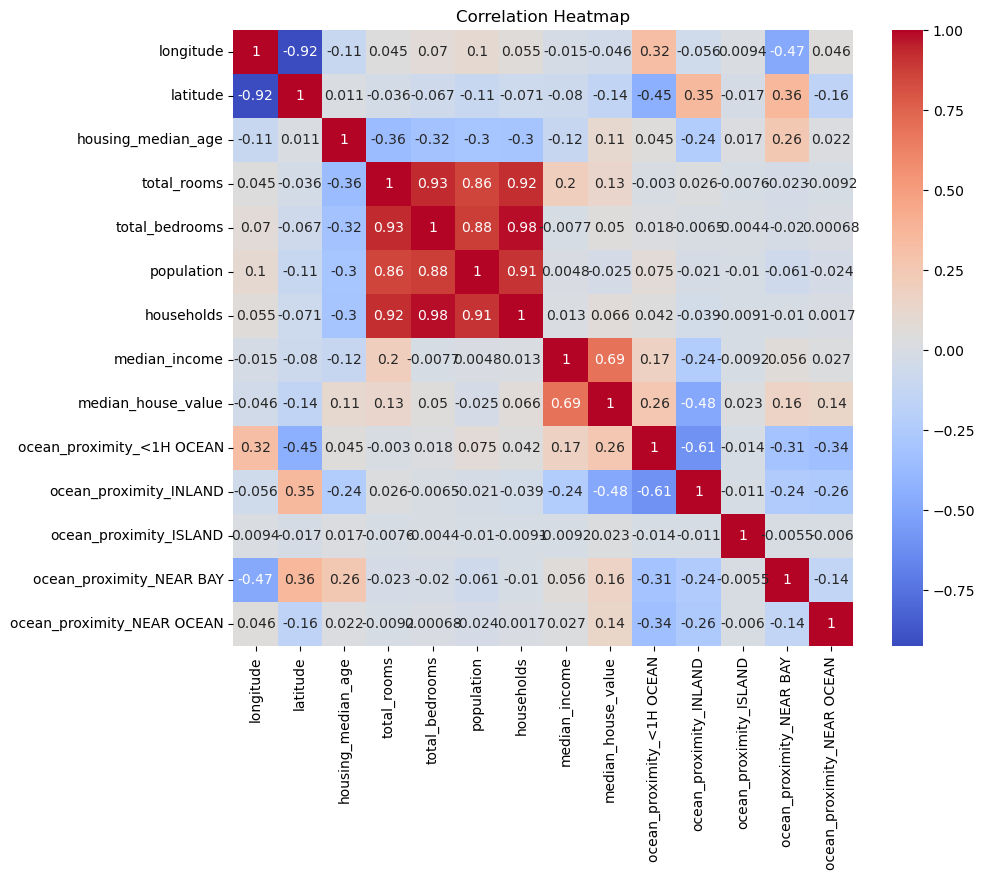

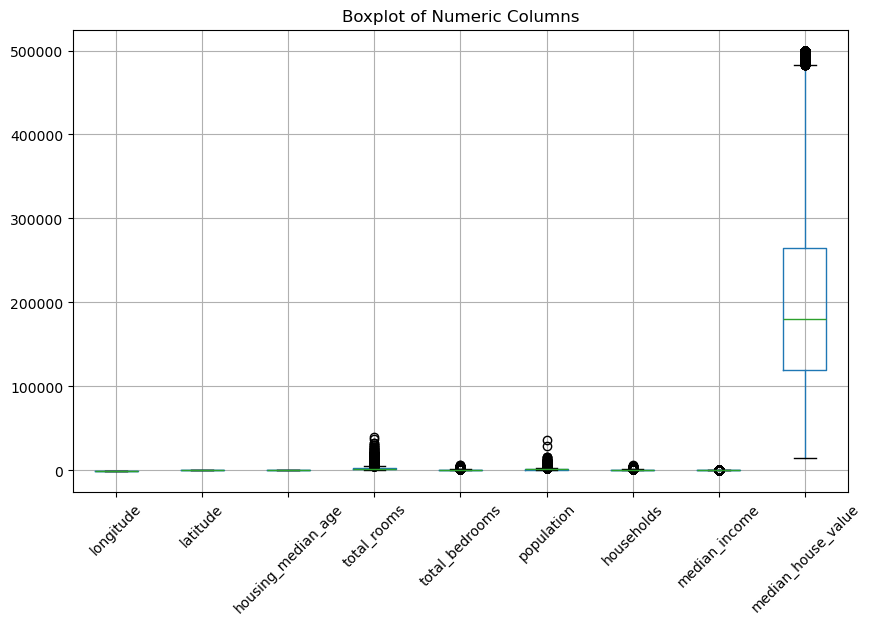

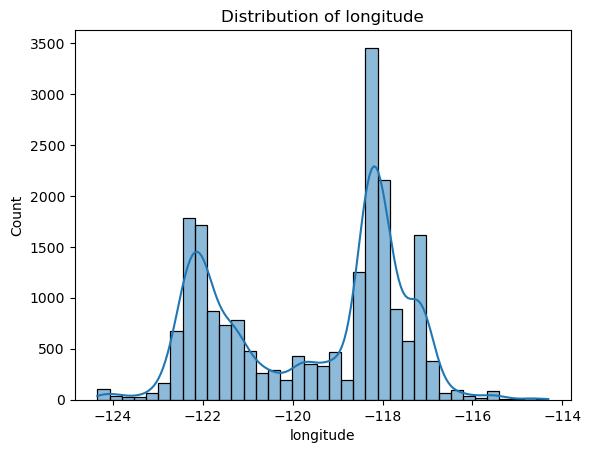

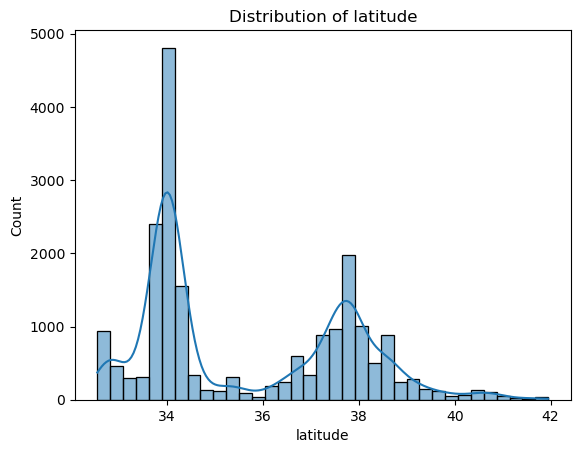

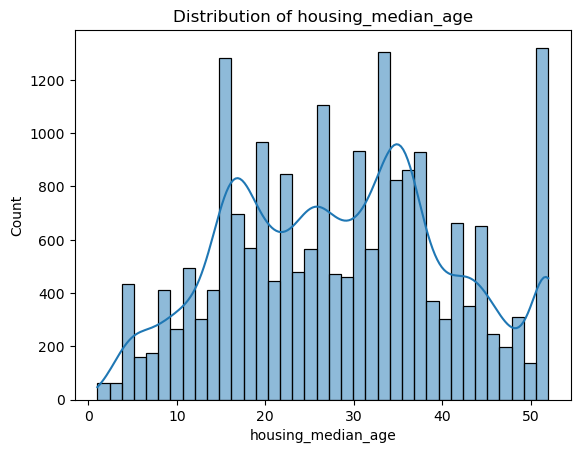

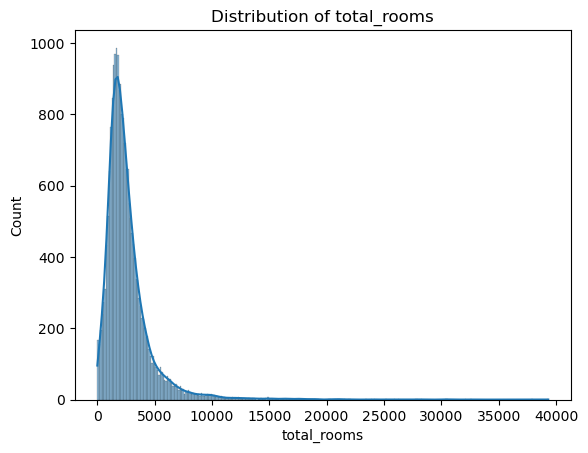

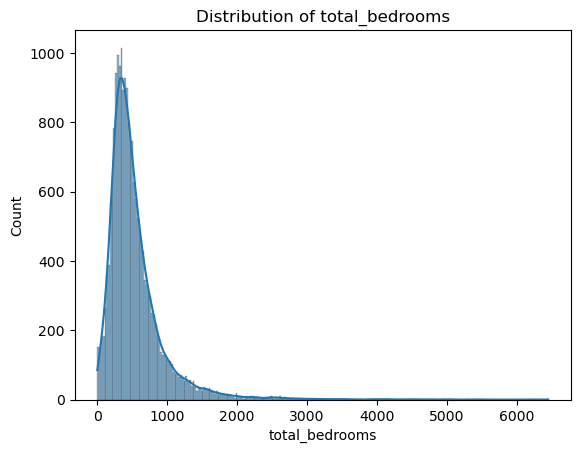

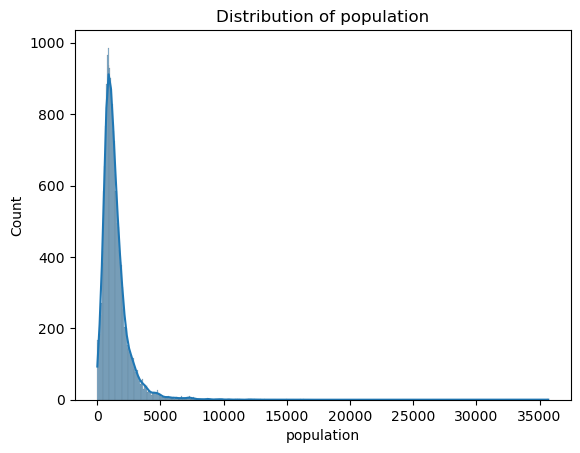

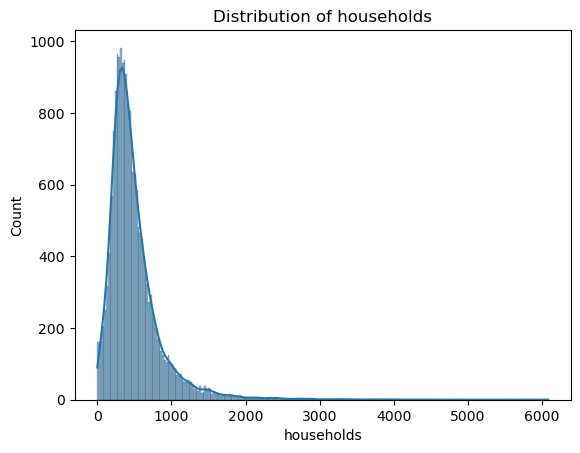

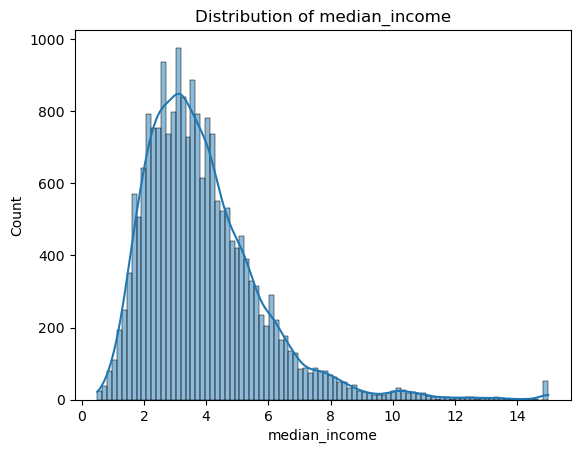

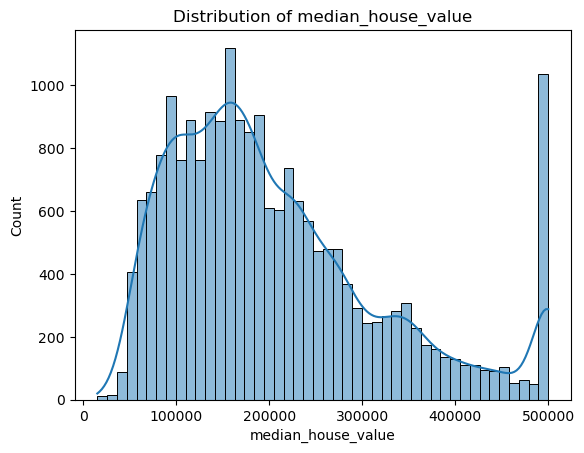

In [6]:
# Defining the validate function.
def validate_data(data):
    """
  Performs a comprehensive validation of a pandas data frame to ensure data quality.

  Args:
      data (pandas.DataFrame): The DataFrame to be validated.

  Returns:
      None (This function performs data validation and visualization but does not return a value)

  This function performs the following data validation checks and visualizations:

      1. Missing Values: Identifies and displays the missing values in each column.
      2. Data Types: Shows the data type of each column.
      3. Data Duplicates: Counts and displays the number of duplicate rows in the DataFrame.
      4. Descriptive Statistics: Generates summary statistics for numerical columns (mean, standard deviation, etc.).
      5. Feature Correlations: Calculates and visualizes the correlation matrix to identify potential relationships between features.
      6. Outlier Visualization: Creates boxplots for each numeric column to visualise outliers.
      7. Distribution Visualization: Generates histograms with kernel density estimation (KDE) to visualize the distribution of each numeric column.

  By performing these checks and visualizations, this function provides valuable insights into the data quality and helps identify potential issues before using the data for further analysis or modelling.
  """
    # Check for missing values.
    print("Missing Values:\n", data.isnull().sum(), "\n")
    # Check data types.
    print("Data Type:\n", data.dtypes, "\n")
    # Check for data duplicates
    print("Number of Duplicates:\n", data.duplicated().sum(), "\n")
    # Descriptive Statistics.
    print("Descriptive Statistics:\n", data.describe(), "\n")
    # Check for correlation in the dataset to identify features to be used in training the model.
    print("Feature Correlations:\n", data.corr(), "\n")
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    # Visualise outliner for each numeric column
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_columns].boxplot(figsize=(10, 6))
    plt.xticks(rotation=45, fontsize=10)
    plt.title("Boxplot of Numeric Columns")
    plt.show()
    # Visualise distribution for each numeric column
    for column in numeric_columns:
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()
validate_data(data) # Run the validation.

In [7]:
data = data.dropna() # Removes any row with as least one NaN

Missing Values:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64 

Data Type:
 longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximit

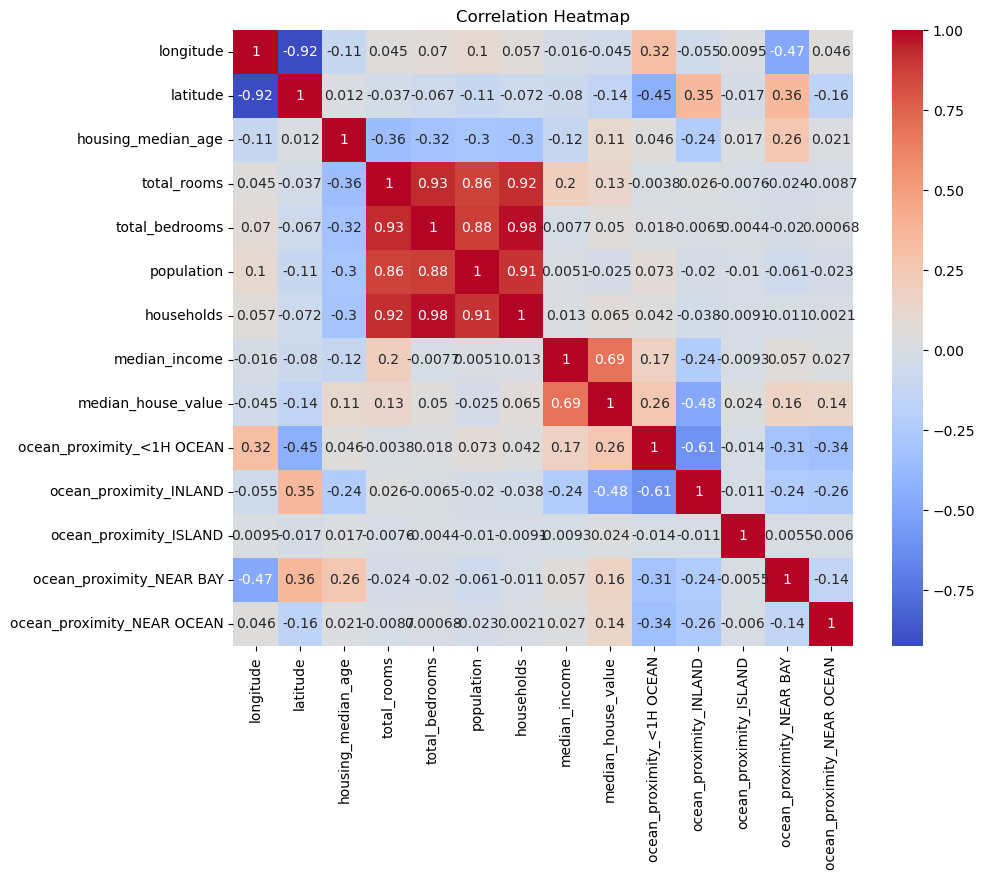

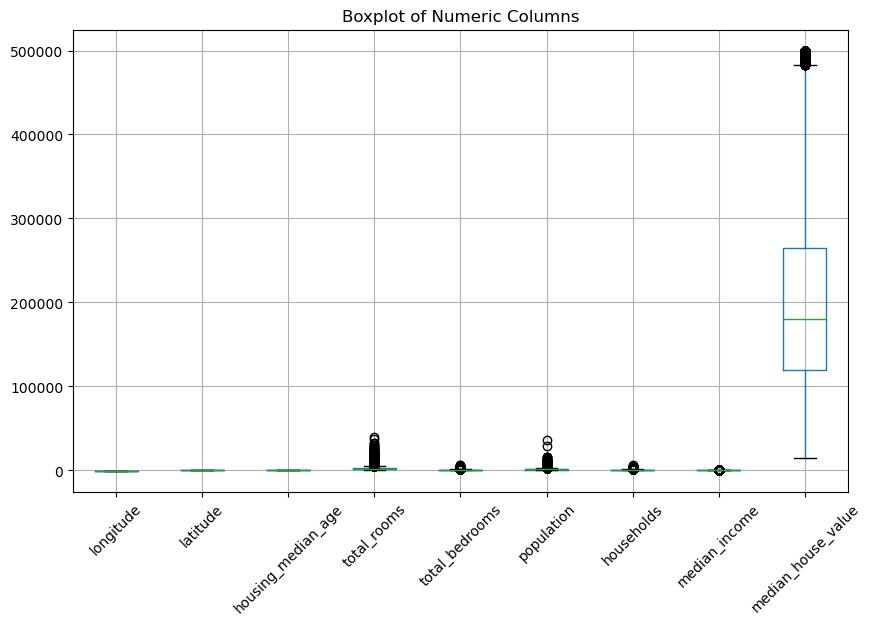

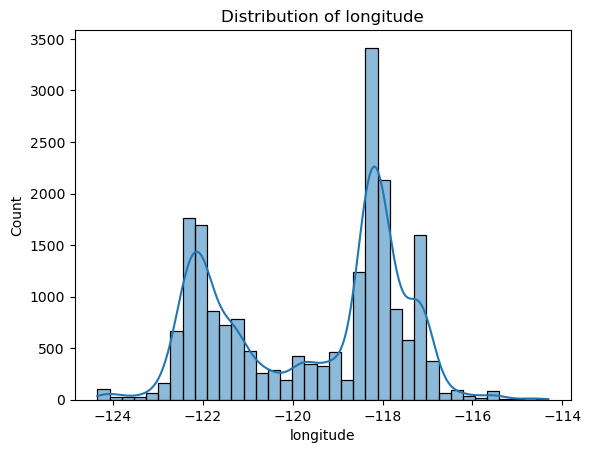

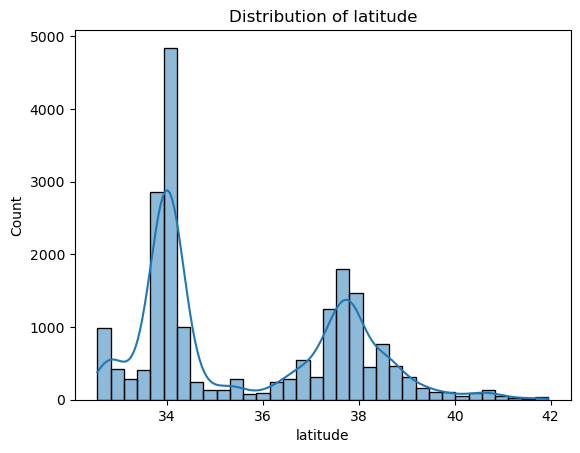

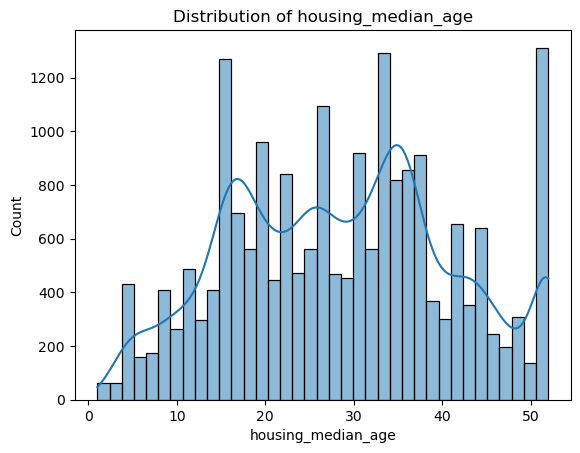

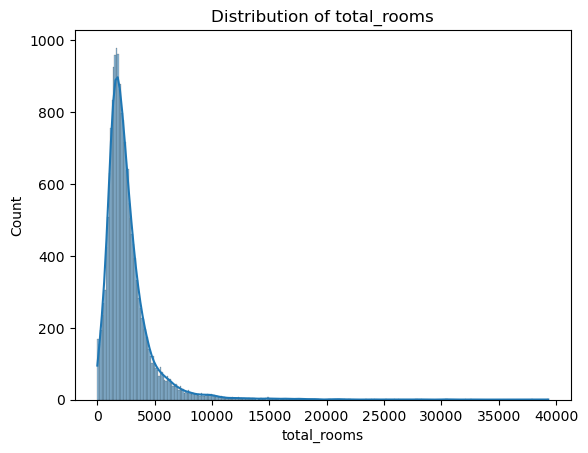

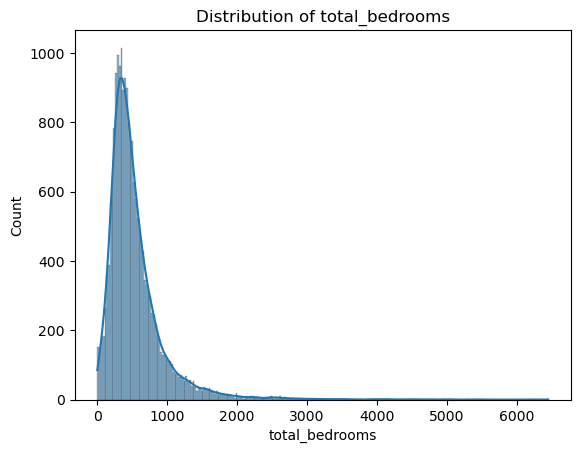

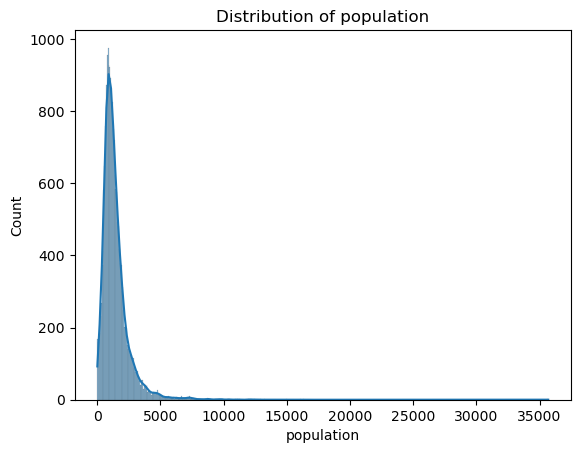

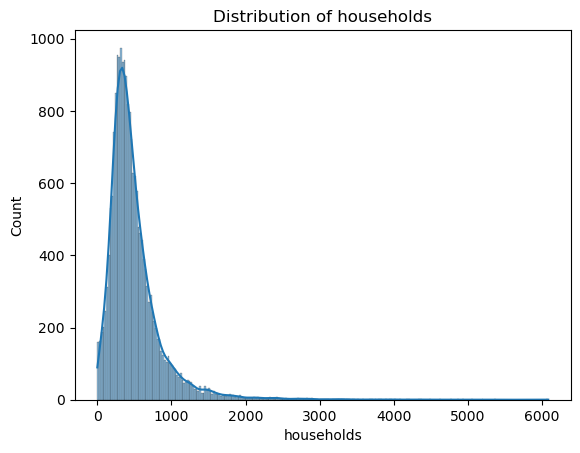

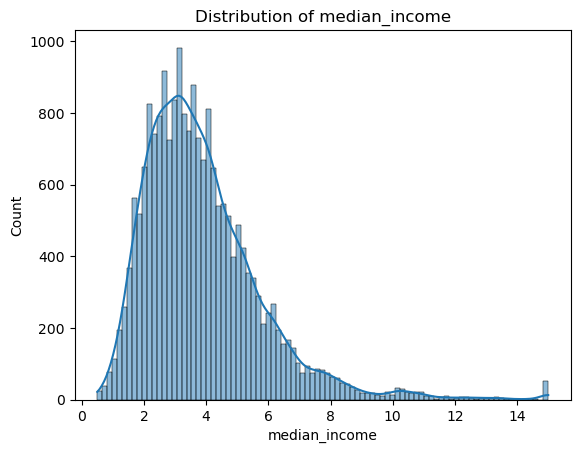

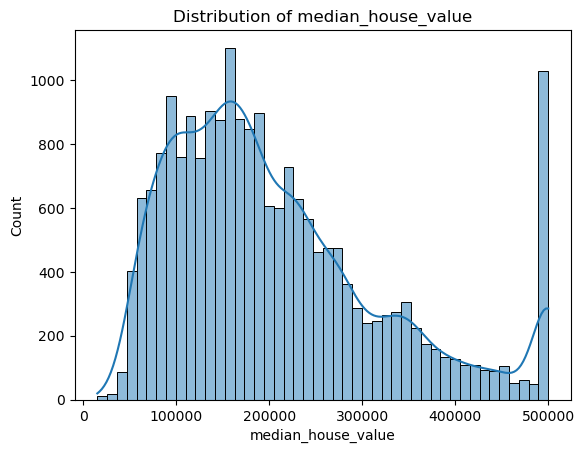

In [8]:
# Running the validate function is ncessary to see if changes have been implemented.
validate_data(data) # Run validation

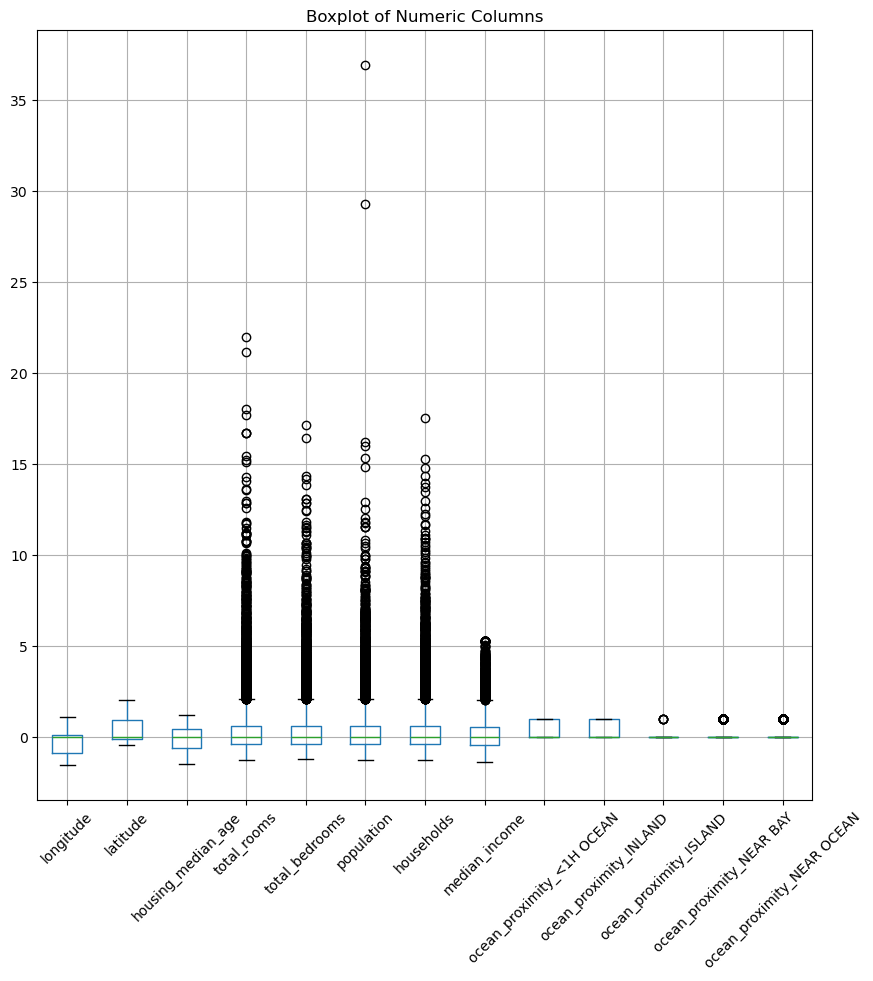

In [9]:
X = data.drop(columns=["median_house_value"]) #"total_bedrooms", "population", "households",
# Apply RobustScaler to specific columns
scaler_robust = RobustScaler()
scaled_data = scaler_robust.fit_transform(X)

# Transform back to a DataFrame
data_pd = pd.DataFrame(scaled_data, columns=X.columns)

# Visualizing the boxplot
numeric_columns = data_pd.select_dtypes(include=['float64', 'int64']).columns
data_pd[numeric_columns].boxplot(figsize=(10, 10))
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Adding the target column back
X = data_pd.values
y = data["median_house_value"].values


In [10]:
# Check the shape of X and y before splitting.
print("X shape before splitting into train and test:", X.shape)
print("y Shape before splitting into train and test:", y.shape, "\n")

# Splitting the array into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

# Check the shape of X and y after splitting.
print("Train set size after splitting into train and test:", X_train.shape, y_train.shape)
print("Test set size after splitting into train and test:", X_test.shape, y_test.shape, "\n")

# Distinguish m and n for X_train only.
print("Number of training examples(m):", X_train.shape[0])
print("Number of features(n):", X_train.shape[1], "\n")

X shape before splitting into train and test: (20433, 13)
y Shape before splitting into train and test: (20433,) 

Train set size after splitting into train and test: (16346, 13) (16346,)
Test set size after splitting into train and test: (4087, 13) (4087,) 

Number of training examples(m): 16346
Number of features(n): 13 



In [11]:
def zscore_normalise_features(X_train):
    """ Computes X and uses the zscore technique to normalise the features.

    Args:
        X (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        X_norm (ndarray(m,n))   : Input data norm by column
        mu (ndarray(n,))        : Mean of each feature
        sigma (ndarray(n,))     : Standard deviation of each feature """

     
    #find the mean of each column/feature in the array X.
    mu = np.mean(X_train, axis=0)        # mu will have shape (n,).
    # find the standard deviation of each column/feature.
    sigma = np.std(X_train, axis=0)     # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_train_nr = (X_train - mu) / sigma     # zscore normaliseing technique formula.

    return (X_train_nr, mu, sigma)

In [12]:
X_norm, X_mu, X_sigma = zscore_normalise_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}", "\n")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}", "\n")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}", "\n")
print(f"Confirmimg the shape of normalised X: {X_norm.shape}")

X_mu = [-2.87734373e-01  3.64266213e-01 -2.02624817e-02  2.94916401e-01
  2.87913821e-01  2.72288761e-01  2.73498406e-01  1.53280211e-01
  4.42371222e-01  3.15428851e-01  1.83531139e-04  1.12688119e-01
  1.29328276e-01], 
X_sigma = [0.5292444  0.56361882 0.66193621 1.27184935 1.1893388  1.20785259
 1.16662311 0.87041538 0.49666782 0.46468644 0.01354612 0.31621117
 0.33556292] 

Peak to Peak range by column in Raw        X:[ 2.60686016  2.4828496   2.68421053 23.22386297 18.35897436 38.15935829
 18.76851852  6.65055268  1.          1.          1.          1.
  1.        ] 

Peak to Peak range by column in Normalized X:[ 4.92562637  4.40519284  4.05508944 18.25991652 15.43628641 31.59272803
 16.08790221  7.64066542  2.01341814  2.15198875 73.82185889  3.16244358
  2.98006705] 

Confirmimg the shape of normalised X: (16346, 13)


In [13]:
# Updating X_train with normalised data.
X_train = X_norm

In [14]:
# confirming class of X-train, y_train, X_test and y_test
# Using a dictionary to check all types
variables ={"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test}
for name, variables in variables.items():
    print(f"Type of {name}, {type(variables)}")

Type of X_train, <class 'numpy.ndarray'>
Type of y_train, <class 'numpy.ndarray'>
Type of X_test, <class 'numpy.ndarray'>
Type of y_test, <class 'numpy.ndarray'>


In [15]:
# Checking data types of both X_train, X_test, y_train and y_test.
variables ={"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test}
for name, variables in variables.items():
    print(f"Type of {name}, {variables.dtype}")

Type of X_train, float64
Type of y_train, float64
Type of X_test, float64
Type of y_test, float64


In [16]:
# Viewing the first 5 rows of our training example.
print(X_train[:5])

[[-1.10651441  0.78620804 -1.16206244  0.82931106  0.92929666  1.13110981
   1.04074393  0.43841173  1.1227399  -0.67879934 -0.01354861 -0.35636982
  -0.38540693]
 [-0.02467137  0.46787317  0.34865716 -0.73855806 -0.85052345 -0.7088994
  -0.85615229 -0.24238852 -0.89067824  1.47318941 -0.01354861 -0.35636982
  -0.38540693]
 [ 0.75804456 -0.71183841 -0.2874353   0.58735021  0.74724238  0.37845927
   0.69152454 -0.10896853 -0.89067824  1.47318941 -0.01354861 -0.35636982
  -0.38540693]
 [ 0.63340827 -0.73524539 -0.04890063 -0.12274217  0.98918293  1.18512356
   1.04868073 -0.86116849  1.1227399  -0.67879934 -0.01354861 -0.35636982
  -0.38540693]
 [ 1.15189525 -1.21742909 -0.12841219 -0.36563185 -0.34508329 -0.10500803
  -0.24766396 -0.16898645 -0.89067824 -0.67879934 -0.01354861 -0.35636982
   2.59466012]]


In [18]:
# Initialising parameters
m = X_train.shape[0] # moving the training example into m
n = X_train.shape[1] # moving the features into n
w = np.zeros((n,))        # w is the weight of the features, and therefore, it will be initialised to have a format of ndarray with shape n 
b = 0.0                   # b is the bias, which is a single scalar or float figure but should be initialised to 0.0.
alpha = 0.05              
num_iters = 15000
lambda_ = 1

In [19]:
def compute_cost1(X_train, y_train, w, b, lambda_):
    """
    Compute the cost function for linear regression.

    Args:
            X_train_norm (ndarray,(m,n)) : Norm Input variable with m training examples and n features.
            y_train (ndarray,(m,))       : target variable with shape m.
            w (ndarray,(n,))             : model parameter in an array structure with shape n.
            b (float64)                  : model parameter.

    Returns:
        total_cost (float) : The cost of using w,b as the model parameters for linear regression
            to fit the data point in X and y
    """
    # m = X_train_norm.shape[0] # moving the training examples into m
    cost_sum = 0 
    for i in range(m):
        f_wb = np.dot(X_train[i], w) + b
        cost = (f_wb - y_train[i]) ** 2
        cost_sum = cost_sum + cost
    cost_sum = cost_sum / (2 * m)

    reg_cost = 0
    for j in range (n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/(2*m)) * reg_cost
    
    total_cost = cost_sum + reg_cost
    return total_cost

In [20]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost1(X_train, y_train, w, b, lambda_)
print(f'Cost at pre-chosen optimal parameters : {cost}')

Cost at pre-chosen optimal parameters : 27969393265.348404


In [21]:
# Compute gradient descent
def compute_gradient1(X_train, y_train, w, b, lambda_):
    """
    Compute gradient for linear regression.

     Args:
      X_train_norm (ndarray (m,n)): Data, m examples with n features
      y_train (ndarray (m,))      : target values with shape m
      w (ndarray (n,))            : model parameter in an array structure with shape n  
      b (float64)                 : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        err = (np.dot(X_train[i], w) + b) - y_train[i]
        for j in range(n):
            dj_dw[j] += err * X_train[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m

    for j in range(n):
      dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
  
    return dj_dw, dj_db

In [22]:
#Compute and display gradient 
tmp_dj_dw1, tmp_dj_db1 = compute_gradient1(X_train, y_train, w, b, lambda_ = 1)
print(f'dj_db at initial w,b: {tmp_dj_db1}')  # Should be a scalar
print(f'dj_dw at initial w,b: \n{tmp_dj_dw1}')  # Should be a vector

dj_db at initial w,b: -206644.40009788328
dj_dw at initial w,b: 
[  5541.5272851   16329.57478349 -11970.09101664 -15651.60487846
  -5908.15921779   2759.99763037  -7662.24201697 -79235.47329575
 -29685.25025287  55506.05233187  -3137.70810294 -18280.72276825
 -15574.21456807]


In [23]:
def gradient_descent (X_train, y_train, w, b, compute_gradient1, compute_cost1, alpha, num_iters):
    """ 
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
     X_train_norm (ndarray (m,n))   : Data, m examples with n features
     y_train (ndarray (m,))         : target values
     w (ndarray (n,))               : initial model parameters  
     b (scalar)                     : initial model parameter
     cost_function                  : function to compute cost
     gradient_function              : function to compute the gradient
     alpha (float)                  : Learning rate
     num_iters (int)                : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))              : Updated values of parameters 
      b (scalar)                    : The updated value of the parameter 
    """
    total_cost_history = [] # An array to store total_cost_history and w's at each iteration primarily for graphing later
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient1(X_train, y_train, w, b, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i % 100 == 0:
            cost_val = compute_cost1(X_train, y_train, w, b, lambda_)
            total_cost_history.append(cost_val)
            
            print(f"Iteration {i}: Cost={cost_val:.4f}, b={b:.2f}")
            # Printing w as a flattened array for readability
            print(f"w: {w.flatten()}")
    return w, b, total_cost_history

In [24]:
w_final1, b_final1, cost_hist1 = gradient_descent (X_train, y_train, w, b, compute_gradient1, compute_cost1, alpha, num_iters)

Iteration 0: Cost=25330349673.6908, b=10332.22
w: [ -277.07636425  -816.47873917   598.50455083   782.58024392
   295.40796089  -137.99988152   383.11210085  3961.77366479
  1484.26251264 -2775.30261659   156.88540515   914.03613841
   778.7107284 ]
Iteration 100: Cost=2470350798.9918, b=205482.13
w: [-11933.05937541 -10162.14695005  13451.31671058   8287.58824087
  11116.55325974 -22324.50236306   9308.88955499  69757.19260075
  10019.25625776 -23316.02266355   3466.28927871   7069.96430406
  10656.24588913]
Iteration 200: Cost=2414338704.1327, b=206637.52
w: [-16992.93125875 -15588.16701153  14453.73732578   4056.96317347
  18709.84558191 -31972.64391928  15292.28792313  71406.31280721
   9597.82032583 -21339.39550688   3402.14321933   5724.63023166
   9813.12657088]
Iteration 300: Cost=2389741115.1650, b=206644.36
w: [-2.15530466e+04 -2.04335456e+04  1.44456532e+04  4.21614647e+01
  2.33468758e+04 -3.67041993e+04  1.90077222e+04  7.22353412e+04
  9.21088344e+03 -2.00101063e+04  3.34

In [25]:
# 5. Print results
print("\nAfter gradient descent:")
print(f"w: {w_final1.flatten()}")
print(f"b: {b_final1:.2f}")
print(f"Final cost: {compute_cost1(X_train, y_train, w_final1, b_final1, lambda_):.4f}")


After gradient descent:
w: [-54258.78218035 -54686.34002506  13601.03585541 -13576.39287509
  42908.86913068 -41107.97643755  16353.15179481  74528.48339351
   6407.5189756  -12274.0768305    3069.54841545   2113.30452318
   5397.96721889]
b: 206644.40
Final cost: 2345742220.5310


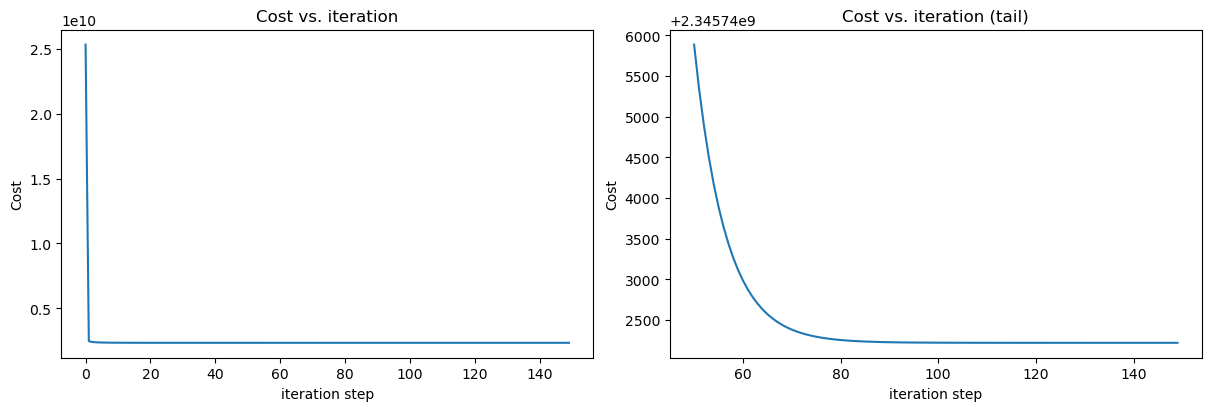

In [26]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist1)
ax2.plot(50 + np.arange(len(cost_hist1[50:])), cost_hist1[50:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [27]:
# using sklearn to confirm the values of the iteration method for linear regression.
# the value for b is the same, and so are the values for w.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Scikit-learn w:", model.coef_)
print("Scikit-learn b:", model.intercept_)

Scikit-learn w: [-5.44076984e+04 -5.48483033e+04  1.35702643e+04 -1.35921174e+04
  4.29752836e+04 -4.11324605e+04  1.63620574e+04  7.45466814e+04
 -1.23827872e+17 -1.15854362e+17 -3.37728265e+15 -7.88369110e+16
 -8.36616354e+16]
Scikit-learn b: 206566.9750326031


In [28]:
# Normalising the X_test to test our model.
def zscore_normalise_features(X_test):
    """
    Computes X_test and uses the zscore technique to normalise the features.

    Args:
        X_test (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        sigma (ndarray(n,))     : Standard deviation of each feature
    """
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_test_norm1 = (X_test - X_mu) / X_sigma     # zscore normaliseing technique formula.

    return (X_test_norm1)

In [29]:
X_test_norm = zscore_normalise_features(X_test)

In [30]:
y_pred = np.dot(X_test, w_final1) + b_final1 # making final prediction
for i in range(10):  # First 10 predictions
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]:.2f}")

Predicted: 207375.19, Actual: 245800.00
Predicted: 175122.83, Actual: 137900.00
Predicted: 211279.80, Actual: 218200.00
Predicted: 183802.69, Actual: 220800.00
Predicted: 223185.36, Actual: 170500.00
Predicted: 127367.69, Actual: 75000.00
Predicted: 269787.65, Actual: 269400.00
Predicted: 253479.84, Actual: 228900.00
Predicted: 355132.27, Actual: 500001.00
Predicted: 114948.79, Actual: 80800.00


In [37]:
# Checking the performance of our model.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test  = r2_score(y_test, y_pred)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R² : {r2_test:.2f}")

# I believe our model can perform better but with a different model.

Test MSE: 5461826442.05
Test MAE: 56973.54
Test R² : 0.60


In [32]:
# using sklearn to check if our model generalises adequately.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Training MAE: {mae_train:.2f}")
print(f"Training R² : {r2_train:.2f}")

Training MSE: 4690520761.09
Training MAE: 49534.81
Training R² : 0.65


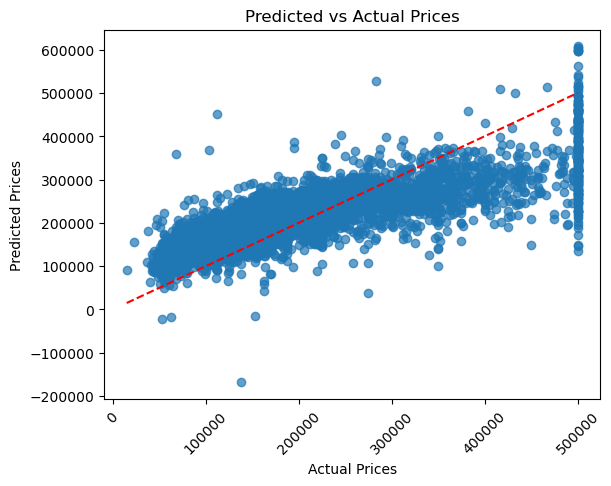

In [35]:
# Plotting the predicted values vs actual values.
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

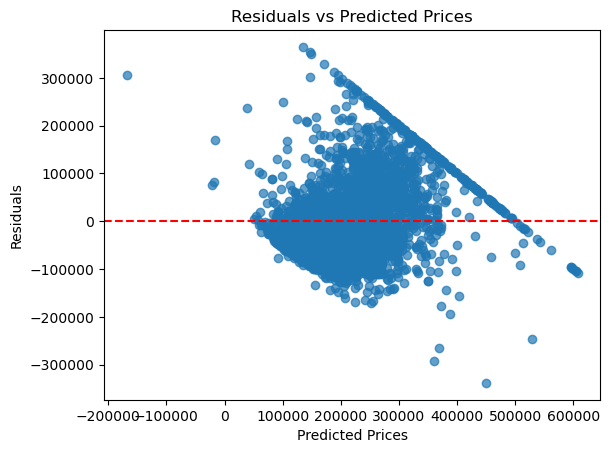

In [34]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

In [ ]:
# There seems to be a pattern downward trend for higher predicted prices, suggesting: Possible non-linearity in the data.
# Linear regression is not a suitable model to capture the non-linearity in the dataset.